<a href="https://colab.research.google.com/github/WeildTheSword/Personal-Website/blob/main/DataScienceM1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyzing Music Trends and Popularity Across Streaming Platforms




> Michael Weild and Hubert Mendez



## Project Goals




This project focuses on analyzing the "Most Streamed Spotify Songs 2024" dataset to achieve two interrelated goals:  1) We will examine audio features to identify common traits in successful tracks, compare song performance across various streaming platforms, and explore how artist attributes influence song success. 2) Additionally, we aim to identify temporal trends in music preferences and how they evolve over time, as well as investigate the cross-platform presence of songs to understand their reach and impact across different music services. In the hopes to better understand the characteristics that drive song popularity.




## Collaboration Plan:

> For Milestone 1, our team held consistent weekly meetings to discuss our progress, set objectives, and establish goals for the upcoming week. To facilitate collaboration, we plan to use the Colab platform, which allows  us to develop and test our code efficiently. Colab allows us to contribute to the project asynchronously, streamline version control, and ensure that everyone  aces with the current development. We hope to continue this collaboration style for the reminder of the project.




## ETL (Extraction, Transform, and Load)

For this project, our team adopted an innovative approach to data implementation. As demonstrated in the code below, we leveraged Kaggle's API to directly import our datasets while utilizing Python's shutil library. This combination allows us to overcome Google Colab's user permission restrictions by programmatically managing and relocating files within the environment.

> While we initially considered simply downloading datasets from Kaggle and storing the CSV files locally, this traditional method presented a critical limitation: any user attempting to reproduce our analysis would need to manually download the datasets and maintain identical local file structures. This requirement creates unnecessary friction for collaboration and scalability.

By implementing an API-driven solution, we've aligned our project with open-source principles. Our approach ensures universal accessibility – anyone can reproduce our analysis or extend our work without local file dependencies. Future researchers can build upon our findings with just two requirements:

1.   A standard internet connection
2.   The ability to execute our provided code

This methodology eliminates common barriers to reproducibility while maintaining the security benefits of Colab's sandboxed environment. The shutil integration further streamlines file operations, creating a self-contained workflow that adapts seamlessly to Colab's ephemeral storage system.





>  **NOTE: RUN EVERY CELL IN SEQUENTIAL ORDER, TOP-to-BOTTOM**



In [40]:
import shutil
import os
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt

# Download dataset (fixed username typo: "nelginiyewithana" → "nelgiriyewithana")
path = kagglehub.dataset_download("nelgiriyewithana/most-streamed-spotify-songs-2024")

print("Path to dataset files:", path)
print(os.listdir(path))  # Output shows: ['Most Streamed Spotify Songs 2024.csv']


# Destination path (place it in Colab's `/content` directory)
# Need to ensure that irrespective of the csv file name that our program knows how to appropraitely reference it.
# This will avoid errors when fetching
# Get CSV filename (case-insensitive)
csv_file = next(f for f in os.listdir(path) if f.lower().endswith('.csv'))

# Source path (directly to the CSV file)
# Define paths
source_csv = os.path.join(path, csv_file)  # Full path to CSV
destination_csv = f"/content/{csv_file}"   # Fixed syntax

# Copy the file
shutil.copy(source_csv, destination_csv)  # Fixed function call

print(f"Copied {csv_file} to {destination_csv}")

Path to dataset files: /root/.cache/kagglehub/datasets/nelgiriyewithana/most-streamed-spotify-songs-2024/versions/1
['Most Streamed Spotify Songs 2024.csv']
Copied Most Streamed Spotify Songs 2024.csv to /content/Most Streamed Spotify Songs 2024.csv


## Description of Dataset:




Our project will be handling the "Most Streamed Spotify Songs 2024" dataset, made available through Kaggle. This dataset contains 5,000 observations and 29 columns, providing insights into each track's attributes. The data includes details like track name, album, artist, release date, and ISRC, along with metrics such as all-time rank, track score, and streaming data from platforms like Spotify, YouTube, TikTok, Apple Music, Deezer, Pandora, and SoundCloud. It also covers playlist counts, popularity, and whether the track is explicit.

With this data, we can explore the characteristics that drive song popularity, analyze how different platforms contribute to a song's success, and understand how artist attributes influence track performance.The dataset is well established, and we are confident that it provides sufficient data for a successful project and that answers our questions. However, if we encounter limitations in the analysis due to a lack of data or information, we will explore adding related datasets to address these issues.





# **Data Definitions**

Below are all the 29 columns, their data types, and a belief description of each. We had to do some preprocessing steps to ensure that the data had the correct data types. Additionally, we indexed by the ISRC because it is the most unique value in the original dataset.



*   **Track (string):** The name of the song or track.
*   **Album Name (string):** The name of the album to which the track belongs.
*   **Artist (string):** The name of the artist or group who performed the track.
*   **Release Date (string):** The date the track was officially released (in string format).
*   **All Time Rank (int64):** A ranking based on the track’s overall performance, possibly across multiple platforms and metrics.
*   **Track Score (Float64):** A calculated score representing the track’s popularity or success across various metrics. This may factor in streams, playlist counts, and other engagements.
*   **Spotify Streams (float64):** The number of times the track has been streamed on Spotify.
*   **Spotify Playlist Count (float64):** The number of Spotify playlists that the track has been added to.
*   **Spotify Playlist Reach (float64):** The combined reach or audience size of the playlists on which the track has been added.
*   **Spotify Popularity (Int64):** Spotify's internal rating for the track's popularity based on streams, engagement, and other factors.
*   **YouTube Views (float64):** The number of views the track has received on YouTube.
*   **YouTube Likes (float64):** The number of likes (thumbs up) the track has received on YouTube.
*   **TikTok Posts (float64):** The number of TikTok posts that have featured the track.
*   **TikTok Likes (float64):** The number of likes on TikTok posts that feature the track.
*   **TikTok Views (float64):** The total number of views accumulated by TikTok posts that feature the track.
*   **YouTube Playlist Reach (float64):** The combined reach or audience size of YouTube playlists that have included the track.
*   **Apple Music Playlist Count (Int64):** The number of Apple Music playlists the track has been added to.
*   **AirPlay Spins (float64):** The number of times the track has been played via AirPlay (Apple’s wireless streaming service).
*   **SiriusXM Spins (float64):** The number of times the track has been played on SiriusXM satellite radio.
*   **Deezer Playlist Count (Int64):** The number of Deezer playlists the track has been included in.
*   **Deezer Playlist Reach (float64):** The combined reach or audience size of Deezer playlists that feature the track.
*   **Amazon Playlist Count (Int64):** The number of Amazon Music playlists the track has been added to.
*   **Pandora Streams (float64):** The number of times the track has been streamed on Pandora.
*   **Pandora Track Stations (float64):** The number of Pandora stations that have played the track.
*   **Soundcloud Streams (float64):** The number of times the track has been streamed on SoundCloud.
*   **Shazam Counts (float64):** The number of times the track has been identified using the Shazam app.

*   **TIDAL Popularity (Int64):** The track’s popularity score on TIDAL, based on factors like streams and engagement.
*   **Explicit Track (category):** Indicates whether the track contains explicit content (e.g., explicit lyrics or themes). This is usually categorized as "Yes" or "No".
*   **ISRC (string):** The International Standard Recording Code (ISRC) is a unique identifier assigned to a specific track. It is used for tracking and managing rights for recorded music.

In [73]:
import pandas as pd

pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.expand_frame_repr', False)  # Prevent wrapping to multiple lines

# Load the CSV with proper encoding (replace 'latin1' if needed)
df = pd.read_csv(destination_csv, encoding='latin1')

# Display the first few rows
print("Data loaded successfully:")
df.head(10)

Data loaded successfully:


,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,TikTok Views,YouTube Playlist Reach,Apple Music Playlist Count,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",92.0,"84,274,754","1,713,126","5,767,700","651,565,900","5,332,281,936","150,597,040",210.0,"40,975",684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",92.0,"116,347,040","3,486,739","674,700","35,223,547","208,339,025","156,380,351",188.0,"40,778",3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",92.0,"122,599,116","2,228,730","3,025,400","275,154,237","3,369,120,610","373,784,955",190.0,"74,333",536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",85.0,"1,096,100,899","10,629,796","7,189,811","1,078,757,968","14,603,725,994","3,351,188,582",394.0,"1,474,799","2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",88.0,"77,373,957","3,670,188","16,400",NaN,NaN,"112,763,851",182.0,"12,185",1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1
5,Lovin On Me,Lovin On Me,Jack Harlow,11/10/2023,USAT22311371,6,410.1,"670,665,438","105,892","175,421,034",83.0,"131,148,091","1,392,593","4,202,367","214,943,489","2,938,686,633","2,867,222,632",138.0,"522,042","4,654",86.0,"17,167,254",152.0,"138,529,362","50,982","9,438,601","4,517,131",NaN,1
6,Beautiful Things,Beautiful Things,Benson Boone,1/18/2024,USWB12307016,7,407.2,"900,158,751","73,118","201,585,714",86.0,"308,723,145","4,120,760",NaN,"29,584,940","534,915,313","4,601,579,812",280.0,"383,478",429,168.0,"48,197,850",154.0,"65,447,476","57,372",NaN,"9,990,302",NaN,0
7,Gata Only,Gata Only,FloyyMenor,2/2/2024,QZL382406049,8,375.8,"675,079,153","40,094","211,236,940",92.0,"228,382,568","1,439,495","3,500,000","338,546,668","3,804,584,163","2,112,581,620",160.0,"17,221",30,87.0,"33,245,595",53.0,"3,372,428","5,762",NaN,"6,063,523",NaN,1
8,Danza Kuduro - Cover,ýýýýýýýýýýýýýýýýýýýýý - ýýýýýýýýýýýýýýýýýý -,MUSIC LAB JPN,6/9/2024,TCJPA2463708,9,355.7,"1,653,018,119",1,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
9,BAND4BAND (feat. Lil Baby),BAND4BAND (feat. Lil Baby),Central Cee,5/23/2024,USSM12404354,10,330.6,"90,676,573","10,400","184,199,419",86.0,"32,735,244","988,682","325,800","121,574,500","974,656,200","174,706,874",191.0,"3,823",117,78.0,"10,800,098",92.0,"1,005,626",842,"3,679,709","666,302",NaN,1


In [72]:
# In order to ensure that we are processing all of the data correctly, after reading in the dataframe we need to ensure that each
# of the individual columns are being interpreted correctly.
df.dtypes

,0
Track,object
Album Name,object
Artist,object
Release Date,object
All Time Rank,int64
Track Score,float64
Spotify Streams,float64
Spotify Playlist Count,float64
Spotify Playlist Reach,float64
Spotify Popularity,float64


In [21]:
# Based on the output above, we can see that there are many columns which pandas is incorreclty interpreting the data for processing.
# One of the objectives that our group has is that we want to see if the song title length on youtube has any correlation with view count.
# One hypothesis we have is that songs of shorter length (ie. less syllables = easier to pronounce/ simpler to remember) are much more likely to be streamed.

Objective #1: Does song title length on youtube correlate with view count?


> For our first dataframe we will be creating a dataframe that looks exclusively at youtube title length, with youtube views (ie. streams).




In [74]:
# We need to ensure that all columns which hold numeric data are interpreted as floats so that we can
# create summary statistics on the data.
# Columns to convert object datatypes that hold numeric values to numeric.
numeric_cols = [
    'All Time Rank', 'Spotify Streams', 'Spotify Playlist Count',
    'Spotify Playlist Reach', 'YouTube Views', 'YouTube Likes',
    'TikTok Posts', 'TikTok Likes', 'TikTok Views',
    'YouTube Playlist Reach', 'AirPlay Spins', 'SiriusXM Spins',
    'Deezer Playlist Reach', 'Pandora Streams', 'Pandora Track Stations',
    'Soundcloud Streams', 'Shazam Counts'
]

# Instead of manually converting each column that we want interpreted as a float, we can create a for loop that processes all of them.
# Below, we are converting columns to numeric (handling commas and invalid values)
for col in numeric_cols:
    df[col] = pd.to_numeric(
        df[col].astype(str).str.replace(',', ''),
        errors='coerce'
    )

# One of the data types in the dataset that we need to handle a bit differently is the explicit track column.
# This is a binary decision variable, hence it should be converted to a categorical type.
df['Explicit Track'] = df['Explicit Track'].astype('category')
df.dtypes

,0
Track,object
Album Name,object
Artist,object
Release Date,object
ISRC,object
All Time Rank,int64
Track Score,float64
Spotify Streams,float64
Spotify Playlist Count,float64
Spotify Playlist Reach,float64


In [75]:
df.set_index('ISRC', inplace=True)
df.head(10)

,Track,Album Name,Artist,Release Date,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,TikTok Views,YouTube Playlist Reach,Apple Music Playlist Count,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
ISRC,,,,,,,,,,,,,,,,,,,,,,,,,,,,
QM24S2402528,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,1,725.4,3.904709e+08,30716.0,196631588.0,92.0,8.427475e+07,1713126.0,5767700.0,6.515659e+08,5.332282e+09,1.505970e+08,210.0,40975.0,684.0,62.0,17598718.0,114.0,18004655.0,22931.0,4818457.0,2669262.0,NaN,0
USUG12400910,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,2,545.9,3.237039e+08,28113.0,174597137.0,92.0,1.163470e+08,3486739.0,674700.0,3.522355e+07,2.083390e+08,1.563804e+08,188.0,40778.0,3.0,67.0,10422430.0,111.0,7780028.0,28444.0,6623075.0,1118279.0,NaN,1
QZJ842400387,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,3,538.4,6.013093e+08,54331.0,211607669.0,92.0,1.225991e+08,2228730.0,3025400.0,2.751542e+08,3.369121e+09,3.737850e+08,190.0,74333.0,536.0,136.0,36321847.0,172.0,5022621.0,5639.0,7208651.0,5285340.0,NaN,0
USSM12209777,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,4,444.9,2.031281e+09,269802.0,136569078.0,85.0,1.096101e+09,10629796.0,7189811.0,1.078758e+09,1.460373e+10,3.351189e+09,394.0,1474799.0,2182.0,264.0,24684248.0,210.0,190260277.0,203384.0,NaN,11822942.0,NaN,0
USUG12403398,Houdini,Houdini,Eminem,5/31/2024,5,423.3,1.070349e+08,7223.0,151469874.0,88.0,7.737396e+07,3670188.0,16400.0,NaN,NaN,1.127639e+08,182.0,12185.0,1.0,82.0,17660624.0,105.0,4493884.0,7006.0,207179.0,457017.0,NaN,1
USAT22311371,Lovin On Me,Lovin On Me,Jack Harlow,11/10/2023,6,410.1,6.706654e+08,105892.0,175421034.0,83.0,1.311481e+08,1392593.0,4202367.0,2.149435e+08,2.938687e+09,2.867223e+09,138.0,522042.0,4654.0,86.0,17167254.0,152.0,138529362.0,50982.0,9438601.0,4517131.0,NaN,1
USWB12307016,Beautiful Things,Beautiful Things,Benson Boone,1/18/2024,7,407.2,9.001588e+08,73118.0,201585714.0,86.0,3.087231e+08,4120760.0,NaN,2.958494e+07,5.349153e+08,4.601580e+09,280.0,383478.0,429.0,168.0,48197850.0,154.0,65447476.0,57372.0,NaN,9990302.0,NaN,0
QZL382406049,Gata Only,Gata Only,FloyyMenor,2/2/2024,8,375.8,6.750792e+08,40094.0,211236940.0,92.0,2.283826e+08,1439495.0,3500000.0,3.385467e+08,3.804584e+09,2.112582e+09,160.0,17221.0,30.0,87.0,33245595.0,53.0,3372428.0,5762.0,NaN,6063523.0,NaN,1
TCJPA2463708,Danza Kuduro - Cover,ýýýýýýýýýýýýýýýýýýýýý - ýýýýýýýýýýýýýýýýýý -,MUSIC LAB JPN,6/9/2024,9,355.7,1.653018e+09,1.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [81]:
# Number of unique tracks in data set
print(f"The total number of unique tracks in the dataset is {len(df['Track'].unique())}")

# Number of tracks in the data set
print(f"The total number of tracks is {len(df)}")

# The discrepancy in the total unique track titles vs. ISRC indicates that there are track titles that are duplicate in nature.
# Whenever any music is uploaded to a streaming platform, it is important to mention that labels occasionally
# release two tracks of the same song. One explict, and one clean version.

The total number of unique tracks in the dataset is 4370
The total number of tracks is 4600


**CHALLENGE IDENTIFIED**: One of the current Issues we have noticed is that we are going to need to clean the data further. In some rows, data during the scrubbing process appears to be missing values. We believe that in some instances special characters have been used as placeholders for incomplete data during the pulling process.

> **NOTICE: "ýýýýýýýýýýýýýýýý"** in Album Name

In [82]:
# Example
df.loc['TCJPA2463708']

,TCJPA2463708
Track,Danza Kuduro - Cover
Album Name,ýýýýýýýýýýýýýýýýýýýýý - ýýýýýýýýýýýýýýýýýý -
Artist,MUSIC LAB JPN
Release Date,6/9/2024
All Time Rank,9
Track Score,355.7
Spotify Streams,1653018119.0
Spotify Playlist Count,1.0
Spotify Playlist Reach,15.0
Spotify Popularity,NaN


In [83]:
# We need to delete any row in our table that has the character ý in any of the data.
# Essentially we want to  fetch any ISRC index that has ý in its row, append it to a list,
# and then use that list to delete all rows in our dataframe that have ý in them.
# This will alow us to clean our data

# Step 1: Identify rows containing 'ý' in any column
mask = df.astype(str).apply(lambda x: x.str.contains('ý')).any(axis=1)

# Step 2: Get ISRCs of problematic rows
isrcs_to_remove = mask[mask].index.tolist()

# Step 3: Remove these rows from the DataFrame
df = df.drop(isrcs_to_remove)

# Verification
print(f"Removed {len(isrcs_to_remove)} rows containing 'ý'")
print("Affected ISRCs:", isrcs_to_remove)
print("Cleaned DataFrame shape:", df.shape)

Removed 100 rows containing 'ý'
Affected ISRCs: ['TCJPA2463708', 'KRE671700001', 'TCJPA2406007', 'QZ7XS2400012', 'GBAHS1700024', 'FRX282306294', 'JPKI02118106', 'USUS12400227', 'JPP302300157', 'QM6N21999015', 'QM4TX2478220', 'USUM71712163', 'JPPO02302806', 'QM3DF2191341', 'JPX402200183', 'THSOH2402582', 'QMFMF2334329', 'RUAGV2400963', 'THMOB2412776', 'JPV752408464', 'THSOH2204284', 'THSOH2307725', 'TCJPT2289709', 'GBAHS1700026', 'QMFMF2216359', 'NLZ542101576', 'JPP302300523', 'USSD12100733', 'JPU902302107', 'QZLQR2199831', 'TCAHL2371470', 'USA2P2310675', 'RUA1D2370675', 'CLA1D2300086', 'JPP301900716', 'TRCGH2300006', 'DGA082213263', 'GBAHS1700028', 'USUM72400711', 'CAQ8S1636173', 'FRX282414002', 'QMDA62163216', 'JPU902400966', 'JPTF02017001', 'THSOH2301617', 'QZ7R42353128', 'USA2P1955945', 'QZDA42300052', 'FRX872398704', 'TH2DY2100061', 'FRX872442897', 'KRA301900597', 'JPP302000760', 'RUA1D2242027', 'THSOH2206117', 'JPW462364925', 'THSOH2301669', 'RUAGV2401381', 'CHF432200041', 'JPCO02

**CHALLENGE IDENTIFIED**: After cleaning our dataframe for the instances of special characters, we noticed that the data types in our dataframe kept reverting to our initial state. In order to save time, we ultimately decided to copy the data formatting that we did earlier, to ensure that everything is formatted appropriately for statistics.

In [92]:
# We need to ensure that all columns which hold numeric data are interpreted as floats so that we can
# create summary statistics on the data.
# Columns to convert object datatypes that hold numeric values to numeric.
numeric_cols = [
    'All Time Rank', 'Spotify Streams', 'Spotify Playlist Count',
    'Spotify Playlist Reach', 'YouTube Views', 'YouTube Likes',
    'TikTok Posts', 'TikTok Likes', 'TikTok Views',
    'YouTube Playlist Reach', 'AirPlay Spins', 'SiriusXM Spins',
    'Deezer Playlist Reach', 'Pandora Streams', 'Pandora Track Stations',
    'Soundcloud Streams', 'Shazam Counts'
]

# Instead of manually converting each column that we want interpreted as a float, we can create a for loop that processes all of them.
# Below, we are converting columns to numeric (handling commas and invalid values)
for col in numeric_cols:
    df[col] = pd.to_numeric(
        df[col].astype(str).str.replace(',', ''),
        errors='coerce'
    )

# One of the data types in the dataset that we need to handle a bit differently is the explicit track column.
# This is a binary decision variable, hence it should be converted to a categorical type.
df['Explicit Track'] = df['Explicit Track'].astype('category')

df.head()

,Track,Album Name,Artist,Release Date,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,TikTok Views,YouTube Playlist Reach,Apple Music Playlist Count,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
ISRC,,,,,,,,,,,,,,,,,,,,,,,,,,,,
QM24S2402528,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,1,725.4,3.904709e+08,30716.0,196631588.0,92.0,8.427475e+07,1713126.0,5767700.0,6.515659e+08,5.332282e+09,1.505970e+08,210.0,40975.0,684.0,62.0,17598718.0,114.0,18004655.0,22931.0,4818457.0,2669262.0,0.0,0
USUG12400910,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,2,545.9,3.237039e+08,28113.0,174597137.0,92.0,1.163470e+08,3486739.0,674700.0,3.522355e+07,2.083390e+08,1.563804e+08,188.0,40778.0,3.0,67.0,10422430.0,111.0,7780028.0,28444.0,6623075.0,1118279.0,0.0,1
QZJ842400387,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,3,538.4,6.013093e+08,54331.0,211607669.0,92.0,1.225991e+08,2228730.0,3025400.0,2.751542e+08,3.369121e+09,3.737850e+08,190.0,74333.0,536.0,136.0,36321847.0,172.0,5022621.0,5639.0,7208651.0,5285340.0,0.0,0
USSM12209777,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,4,444.9,2.031281e+09,269802.0,136569078.0,85.0,1.096101e+09,10629796.0,7189811.0,1.078758e+09,1.460373e+10,3.351189e+09,394.0,1474799.0,2182.0,264.0,24684248.0,210.0,190260277.0,203384.0,0.0,11822942.0,0.0,0
USUG12403398,Houdini,Houdini,Eminem,5/31/2024,5,423.3,1.070349e+08,7223.0,151469874.0,88.0,7.737396e+07,3670188.0,16400.0,0.000000e+00,0.000000e+00,1.127639e+08,182.0,12185.0,1.0,82.0,17660624.0,105.0,4493884.0,7006.0,207179.0,457017.0,0.0,1


**CHALLENGE IDENTIFIED:** We also noticed that after we adjusted the data types that we were left with NaN values in many of our rows. This prevented us from preforming mathematical transformations on certain components of the df.

In [93]:
# Replace all NaNs with 0
df.fillna(0, inplace=True)
df.head()
# NOTICE HOW IN THE DATAFRAME BELOW THAT THE NAN VALUES ARE REPLACED WITH 0

,Track,Album Name,Artist,Release Date,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,TikTok Views,YouTube Playlist Reach,Apple Music Playlist Count,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
ISRC,,,,,,,,,,,,,,,,,,,,,,,,,,,,
QM24S2402528,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,1,725.4,3.904709e+08,30716.0,196631588.0,92.0,8.427475e+07,1713126.0,5767700.0,6.515659e+08,5.332282e+09,1.505970e+08,210.0,40975.0,684.0,62.0,17598718.0,114.0,18004655.0,22931.0,4818457.0,2669262.0,0.0,0
USUG12400910,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,2,545.9,3.237039e+08,28113.0,174597137.0,92.0,1.163470e+08,3486739.0,674700.0,3.522355e+07,2.083390e+08,1.563804e+08,188.0,40778.0,3.0,67.0,10422430.0,111.0,7780028.0,28444.0,6623075.0,1118279.0,0.0,1
QZJ842400387,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,3,538.4,6.013093e+08,54331.0,211607669.0,92.0,1.225991e+08,2228730.0,3025400.0,2.751542e+08,3.369121e+09,3.737850e+08,190.0,74333.0,536.0,136.0,36321847.0,172.0,5022621.0,5639.0,7208651.0,5285340.0,0.0,0
USSM12209777,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,4,444.9,2.031281e+09,269802.0,136569078.0,85.0,1.096101e+09,10629796.0,7189811.0,1.078758e+09,1.460373e+10,3.351189e+09,394.0,1474799.0,2182.0,264.0,24684248.0,210.0,190260277.0,203384.0,0.0,11822942.0,0.0,0
USUG12403398,Houdini,Houdini,Eminem,5/31/2024,5,423.3,1.070349e+08,7223.0,151469874.0,88.0,7.737396e+07,3670188.0,16400.0,0.000000e+00,0.000000e+00,1.127639e+08,182.0,12185.0,1.0,82.0,17660624.0,105.0,4493884.0,7006.0,207179.0,457017.0,0.0,1


# **FUTURE OBJECTIVE**

**Using Groupby to Group Tracks by Artist**: Since we realized earlier that there are duplicate track names with different ISRC indexes, we figured it would be more pratical for future data analysis to group each artist with each of their tracks.

Our speculation is that there are clean and explicit versions of the same track. Our objective is to later compare whether or not having a clean or explicit version of a song impacts the reach on various platforms.

In [94]:
# The following dataset utilizes the groupby function to create a series of dataframes for each individual artist and their corresponding tracks
artist_songs = df.groupby('Artist')['Track'].apply(list).reset_index()
artist_songs

,Artist,Track
0,0,"[Cool, I Wanna Party, Marlboro Remix, Melting,..."
1,"""XY""",[Come and Say - Original Mix]
2,$OHO BANI,"[ZEIT, DASS SICH WAS DREHT]"
3,$uicideboy$,"[Us Vs Them, ...And to Those I Love, Thanks fo..."
4,&ME,[The Rapture Pt.III]
...,...,...
1923,will.i.am,[Scream & Shout]
1924,xSyborg,"[Shape of You, Blinding Lights]"
1925,xxanteria,[BAIXO]
1926,yuji,[Old Love]


In [95]:
# Cleaned dataset sorted by trackscore (decending hihgest-lowest)
df_sort_by_TrackScore = df.sort_values(by='Track Score', ascending=False)
df_sort_by_TrackScore


,Track,Album Name,Artist,Release Date,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,TikTok Views,YouTube Playlist Reach,Apple Music Playlist Count,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
ISRC,,,,,,,,,,,,,,,,,,,,,,,,,,,,
QM24S2402528,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,1,725.4,3.904709e+08,30716.0,196631588.0,92.0,8.427475e+07,1713126.0,5767700.0,6.515659e+08,5.332282e+09,1.505970e+08,210.0,40975.0,684.0,62.0,17598718.0,114.0,18004655.0,22931.0,4818457.0,2669262.0,0.0,0
USUG12400910,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,2,545.9,3.237039e+08,28113.0,174597137.0,92.0,1.163470e+08,3486739.0,674700.0,3.522355e+07,2.083390e+08,1.563804e+08,188.0,40778.0,3.0,67.0,10422430.0,111.0,7780028.0,28444.0,6623075.0,1118279.0,0.0,1
QZJ842400387,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,3,538.4,6.013093e+08,54331.0,211607669.0,92.0,1.225991e+08,2228730.0,3025400.0,2.751542e+08,3.369121e+09,3.737850e+08,190.0,74333.0,536.0,136.0,36321847.0,172.0,5022621.0,5639.0,7208651.0,5285340.0,0.0,0
USSM12209777,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,4,444.9,2.031281e+09,269802.0,136569078.0,85.0,1.096101e+09,10629796.0,7189811.0,1.078758e+09,1.460373e+10,3.351189e+09,394.0,1474799.0,2182.0,264.0,24684248.0,210.0,190260277.0,203384.0,0.0,11822942.0,0.0,0
USUG12403398,Houdini,Houdini,Eminem,5/31/2024,5,423.3,1.070349e+08,7223.0,151469874.0,88.0,7.737396e+07,3670188.0,16400.0,0.000000e+00,0.000000e+00,1.127639e+08,182.0,12185.0,1.0,82.0,17660624.0,105.0,4493884.0,7006.0,207179.0,457017.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
QM8DG1703420,For the Last Time,For the Last Time,$uicideboy$,9/5/2017,4585,19.4,3.050500e+08,65770.0,5103054.0,71.0,1.492477e+08,1397590.0,48370.0,2.020200e+07,1.439344e+08,5.301600e+04,3.0,6.0,0.0,2.0,14217.0,0.0,20104066.0,13184.0,50633006.0,656337.0,0.0,1
INT101800122,Dil Meri Na Sune,"Dil Meri Na Sune (From ""Genius"")",Atif Aslam,7/27/2018,4575,19.4,5.228236e+07,4602.0,1449767.0,56.0,9.439202e+08,5347766.0,0.0,1.721000e+03,1.993500e+04,2.497305e+07,1.0,412.0,0.0,1.0,927.0,0.0,0.0,0.0,0.0,193590.0,0.0,0
USUG12000043,Grace (feat. 42 Dugg),My Turn,Lil Baby,2/28/2020,4571,19.4,1.899727e+08,72066.0,6704802.0,65.0,2.010273e+08,1081402.0,7596.0,5.288677e+06,3.684900e+07,2.925315e+07,19.0,204.0,0.0,1.0,74.0,6.0,84426740.0,28999.0,0.0,1135998.0,0.0,1


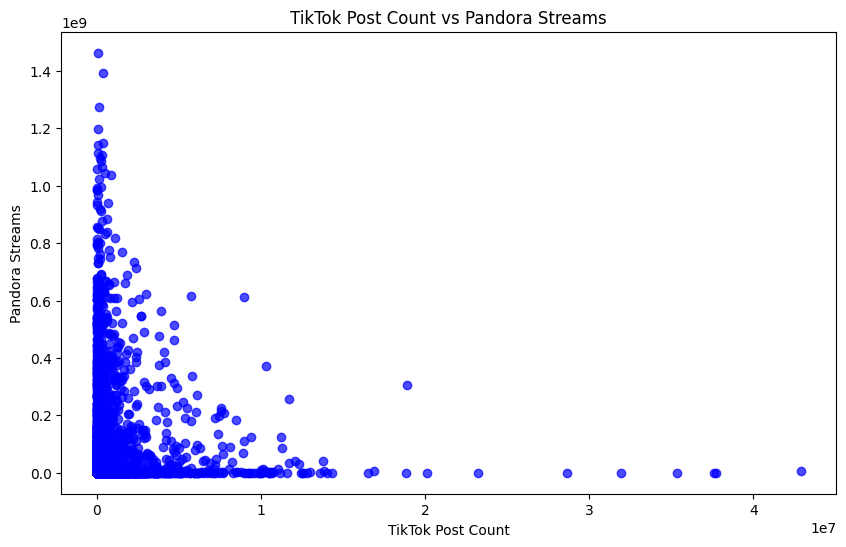

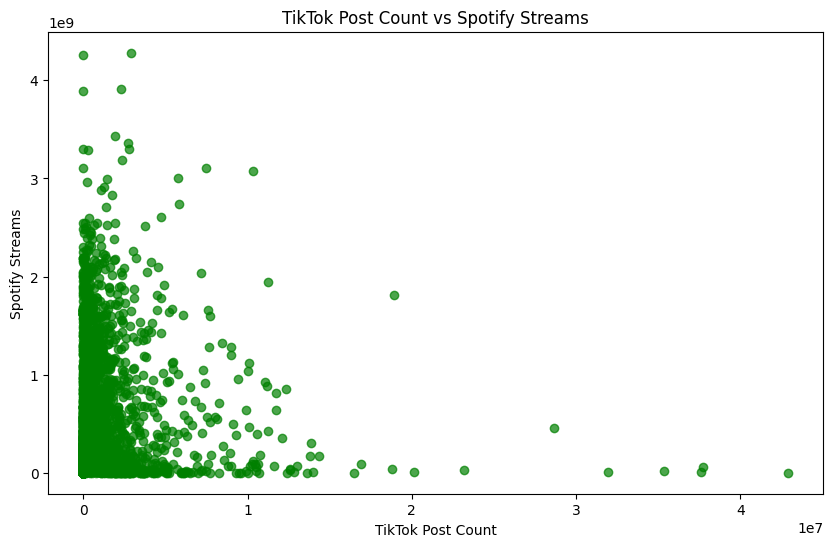

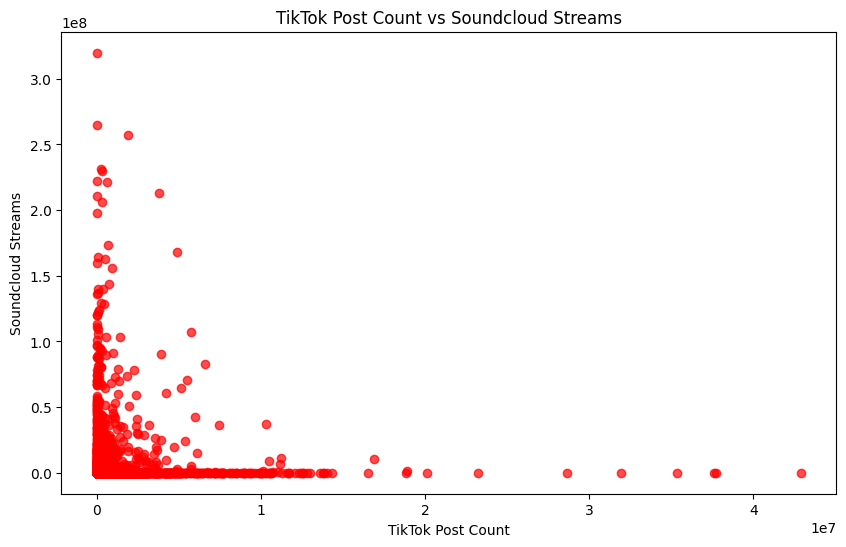

In [97]:
# Define the platforms and corresponding colors
platforms = ['Pandora Streams', 'Spotify Streams', 'Soundcloud Streams']
colors = ['blue', 'green', 'red']

# Loop through each platform
#The zip() function pairs each element from the platforms and colors lists together
for platform, color in zip(platforms, colors):
    plt.figure(figsize=(10, 6))
    plt.scatter(df['TikTok Posts'], df[platform], color=color, alpha=0.7)

    # Add labels and title
    plt.title(f'TikTok Post Count vs {platform}')
    plt.xlabel('TikTok Post Count')
    plt.ylabel(platform)

    # Show the plot
    plt.show()

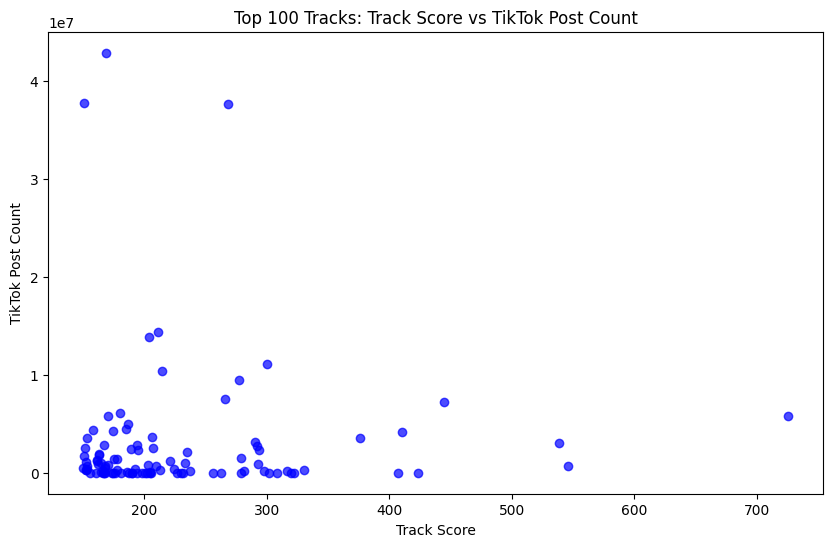

In [102]:
import pandas as pd
import matplotlib.pyplot as plt


#using the cleaned dataset sorted by trackscore (decending hihgest-lowest)
#created a subdataframe that only stores the top 100 ranked songes
top_100_tracks = df_sort_by_TrackScore.head(100)

# Plot the 'Track Score' vs 'TikTok Post Count'
plt.figure(figsize=(10, 6))
plt.scatter(top_100_tracks['Track Score'], top_100_tracks['TikTok Posts'], color='blue', alpha=0.7)

# Add labels and title
plt.title('Top 100 Tracks: Track Score vs TikTok Post Count')
plt.xlabel('Track Score')
plt.ylabel('TikTok Post Count')

# Show the plot
plt.show()

In [103]:
df.dtypes

,0
Track,object
Album Name,object
Artist,object
Release Date,object
All Time Rank,int64
Track Score,float64
Spotify Streams,float64
Spotify Playlist Count,float64
Spotify Playlist Reach,float64
Spotify Popularity,float64


## **OBJECTIVE #2:**
Our group also wanted to make individual datasets based off of each social media platform. This will provide us with the foundation for making inferences on each respective platform. Through our data analysis, we hope to cover biases in content ranking.



> The code below defines all the dataframes for Youtube, Tiktok, and Spotify. We aim to compare how each of these tracks fair across each platform and their differences.



In [131]:
# Suppress scientific notation and show full numbers (for integers stored as floats)
pd.set_option('display.float_format', '{:.0f}'.format)

# YouTube Analysis DataFrame
youtube_cols = [
    'Track', 'Artist', 'Release Date','YouTube Views', 'YouTube Likes', 'YouTube Playlist Reach', 'All Time Rank', 'Explicit Track'
]
youtube_df = df[youtube_cols].copy()

# Spotify Analysis DataFrame
spotify_cols = [
    'Track', 'Artist', 'Release Date', 'Spotify Streams', 'Spotify Popularity', 'Spotify Playlist Count',
    'Spotify Playlist Reach', 'All Time Rank', 'Explicit Track',
]
spotify_df = df[spotify_cols].copy()

# TikTok Analysis DataFrame
tiktok_cols = [
    'Track', 'Artist', 'Release Date', 'TikTok Views','TikTok Likes', 'TikTok Posts', 'All Time Rank', 'Explicit Track'
]
tiktok_df = df[tiktok_cols].copy()

# **Table 1:** Youtube Dataframe

**Description:**


> This first table is from YouTube music data, displaying information on trending songs, including their artist, release date, YouTube views, likes, playlist reach, and rankings. The dataset allows users to analyze trends in music popularity based on metrics such as views and likes, as well as playlist reach, which indicates how widely a song is distributed across curated playlists. The team chose this dataset because it provides insights into song performance and artist impact, allowing for further investigation into questions such as, “Which artists have the highest engagement?” “How do playlist placements correlate with total views and likes?” “Are newer songs performing better than older ones?” and “What role does explicit content play in engagement and rankings?” Furthermore, YouTube is a widely recognized platform for music streaming and engagement, making this dataset a valuable resource for analyzing music trends. However, the team also acknowledges that the dataset's structure and included variables may introduce bias. The team aims to minimize this bias and will objectively assess which metrics are most relevant for future analyses and project milestones.


In [132]:
youtube_df.head(10)

,Track,Artist,Release Date,YouTube Views,YouTube Likes,YouTube Playlist Reach,All Time Rank,Explicit Track
ISRC,,,,,,,,
QM24S2402528,MILLION DOLLAR BABY,Tommy Richman,4/26/2024,84274754,1713126,150597040,1,0
USUG12400910,Not Like Us,Kendrick Lamar,5/4/2024,116347040,3486739,156380351,2,1
QZJ842400387,i like the way you kiss me,Artemas,3/19/2024,122599116,2228730,373784955,3,0
USSM12209777,Flowers,Miley Cyrus,1/12/2023,1096100899,10629796,3351188582,4,0
USUG12403398,Houdini,Eminem,5/31/2024,77373957,3670188,112763851,5,1
USAT22311371,Lovin On Me,Jack Harlow,11/10/2023,131148091,1392593,2867222632,6,1
USWB12307016,Beautiful Things,Benson Boone,1/18/2024,308723145,4120760,4601579812,7,0
QZL382406049,Gata Only,FloyyMenor,2/2/2024,228382568,1439495,2112581620,8,1
USSM12404354,BAND4BAND (feat. Lil Baby),Central Cee,5/23/2024,32735244,988682,174706874,10,1


# **Table 2:** Spotify Dataframe

**Description:**


> This second table comes from Spotify music data and shows how trending songs are doing based on streams, popularity scores, and playlist reach. It gives a solid look at how artists and tracks perform on the platform, making it useful for analyzing trends in streaming. The team chose this dataset because it helps answer questions like, “Which songs are getting the most streams?” “Does being on more playlists mean a song is more popular?” “Do explicit tracks get more engagement?” and “Is there a link between Spotify popularity and YouTube views?” Since Spotify is one of the biggest music streaming services, this dataset gives solid insights into how people consume music. That said, the data might have some biases due to Spotify’s algorithms and how playlists are curated.

In [133]:
spotify_df.head(10)

,Track,Artist,Release Date,Spotify Streams,Spotify Popularity,Spotify Playlist Count,Spotify Playlist Reach,All Time Rank,Explicit Track
ISRC,,,,,,,,,
QM24S2402528,MILLION DOLLAR BABY,Tommy Richman,4/26/2024,390470936,92,30716,196631588,1,0
USUG12400910,Not Like Us,Kendrick Lamar,5/4/2024,323703884,92,28113,174597137,2,1
QZJ842400387,i like the way you kiss me,Artemas,3/19/2024,601309283,92,54331,211607669,3,0
USSM12209777,Flowers,Miley Cyrus,1/12/2023,2031280633,85,269802,136569078,4,0
USUG12403398,Houdini,Eminem,5/31/2024,107034922,88,7223,151469874,5,1
USAT22311371,Lovin On Me,Jack Harlow,11/10/2023,670665438,83,105892,175421034,6,1
USWB12307016,Beautiful Things,Benson Boone,1/18/2024,900158751,86,73118,201585714,7,0
QZL382406049,Gata Only,FloyyMenor,2/2/2024,675079153,92,40094,211236940,8,1
USSM12404354,BAND4BAND (feat. Lil Baby),Central Cee,5/23/2024,90676573,86,10400,184199419,10,1


# **Table 3:** Tiktok Dataframe

**Description:**

> This third table comes from TikTok music data and tracks how songs perform on the platform based on views, likes, and how many posts feature them. Since TikTok plays a huge role in making songs go viral, this dataset helps us see what’s trending and how music spreads. The team picked this dataset to explore questions like, “Do songs with more TikTok posts get more streams on Spotify or YouTube?” “Are explicit tracks more or less popular?” and “How does TikTok engagement compare to traditional streaming numbers?” While TikTok is great for spotting trends, its algorithm is unpredictable, and not every viral song translates into long-term success.


In [134]:
tiktok_df.head(10)

,Track,Artist,Release Date,TikTok Views,TikTok Likes,TikTok Posts,All Time Rank,Explicit Track
ISRC,,,,,,,,
QM24S2402528,MILLION DOLLAR BABY,Tommy Richman,4/26/2024,5332281936,651565900,5767700,1,0
USUG12400910,Not Like Us,Kendrick Lamar,5/4/2024,208339025,35223547,674700,2,1
QZJ842400387,i like the way you kiss me,Artemas,3/19/2024,3369120610,275154237,3025400,3,0
USSM12209777,Flowers,Miley Cyrus,1/12/2023,14603725994,1078757968,7189811,4,0
USUG12403398,Houdini,Eminem,5/31/2024,0,0,16400,5,1
USAT22311371,Lovin On Me,Jack Harlow,11/10/2023,2938686633,214943489,4202367,6,1
USWB12307016,Beautiful Things,Benson Boone,1/18/2024,534915313,29584940,0,7,0
QZL382406049,Gata Only,FloyyMenor,2/2/2024,3804584163,338546668,3500000,8,1
USSM12404354,BAND4BAND (feat. Lil Baby),Central Cee,5/23/2024,974656200,121574500,325800,10,1


In [136]:
from google.colab import drive
drive.mount('/content/drive')

# Command to convert file to html
!jupyter nbconvert --to html "/content/drive/My Drive/DataScienceProject/DataScienceM1.ipynb"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[NbConvertApp] Converting notebook /content/drive/My Drive/DataScienceProject/DataScienceM1.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 4 image(s).
[NbConvertApp] Writing 675632 bytes to /content/drive/My Drive/DataScienceProject/DataScienceM1.html
